**Exercise 9.11**.  Simulate an MA(1) process with $\theta = 0.6$ and $\mu = 100$.  Simulate 36 values but set aside the last 4 values to compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$ and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series. Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the four forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [1]:
require(ggplot2)

Loading required package: ggplot2



In [2]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-0.6)), n=36) + 100

**(a)**

In [3]:
model = arima(Y[1:32], order=c(0, 0, 1), method='ML')
print(model)


Call:
arima(x = Y[1:32], order = c(0, 0, 1), method = "ML")

Coefficients:
          ma1  intercept
      -0.4871   100.0268
s.e.   0.1812     0.1029

sigma^2 estimated as 1.212:  log likelihood = -48.62,  aic = 103.23


**(b)**

In [4]:
pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

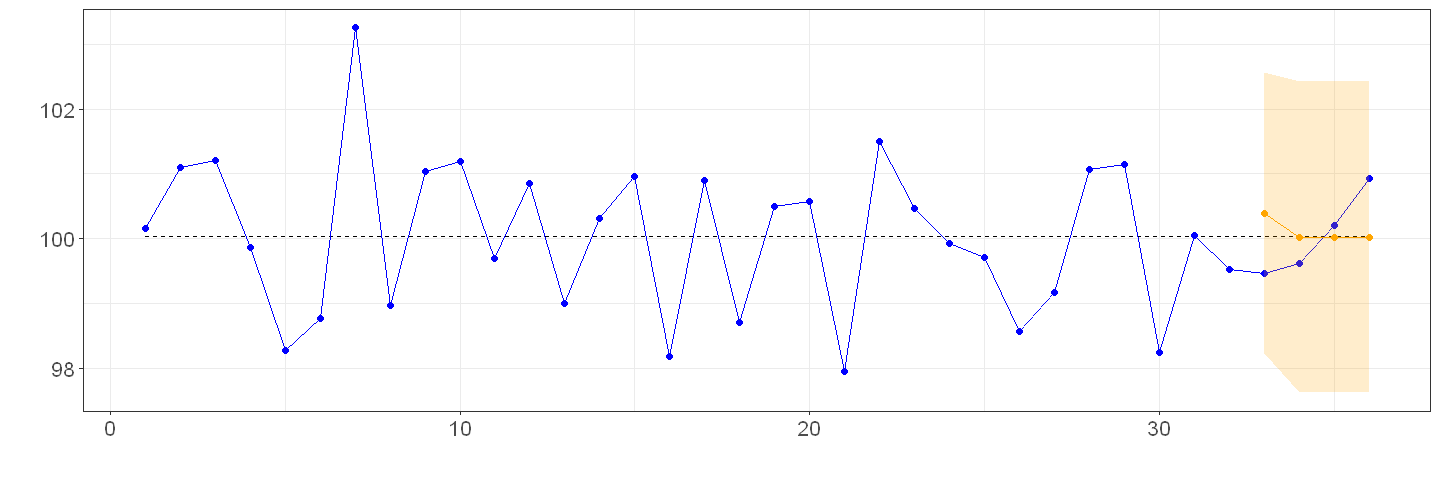

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)** The actual values are within the predicted values -- also note that the predictions are just the process mean beyond the first lag.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:32], order = c(0, 0, 1), method = "ML")

Coefficients:
          ma1  intercept
      -1.0000   100.0348
s.e.   0.1183     0.0115

sigma^2 estimated as 0.3966:  log likelihood = -32.36,  aic = 70.72


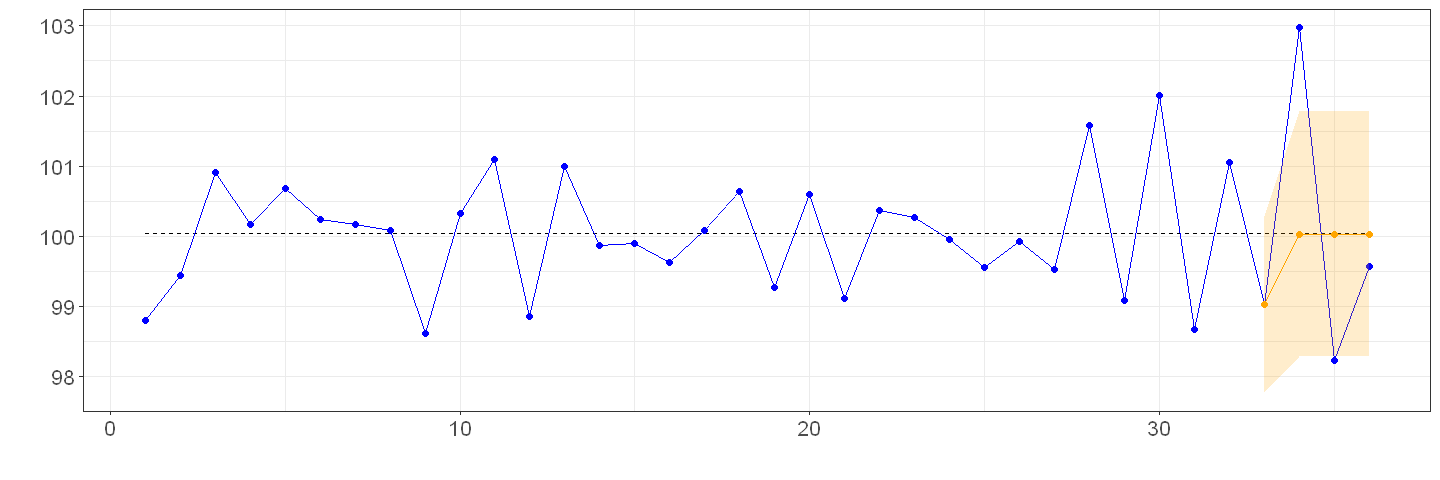

In [6]:
set.seed(2001)
Y = arima.sim(model=list(ma=c(-0.6)), n=36) + 100

model = arima(Y[1:32], order=c(0, 0, 1), method='ML')
print(model)

pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Some of the values seem to be outside of the confidence range -- and they also seem to disagree with most of the process.

**Exercise 9.12**.  Simulate an MA(2) process with $\theta_1 = 1$, $\theta_2 = −0.6$, and $\mu = 100$.  Simulate 36 values but set aside the last 4 values with compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$'s and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series.  Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** What is special about the forecasts at lead times 3 and 4?

**(d)** Compare the four forecasts with the actual values that you set aside.

**(e)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(f)** Repeat parts (a) through (e) with a new simulated series using the same values
of the parameters and same sample size.

**Solution**.

In [7]:
set.seed(2000)
Y = arima.sim(model=list(ma=c(-1, 0.6)), n=36) + 100

**(a)**

In [8]:
model = arima(Y[1:32], order=c(0, 0, 2), method='ML')
print(model)


Call:
arima(x = Y[1:32], order = c(0, 0, 2), method = "ML")

Coefficients:
          ma1     ma2  intercept
      -0.9917  0.6122    99.9926
s.e.   0.1996  0.1752     0.1136

sigma^2 estimated as 1.085:  log likelihood = -47.42,  aic = 102.83


**(b)**

In [9]:
pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

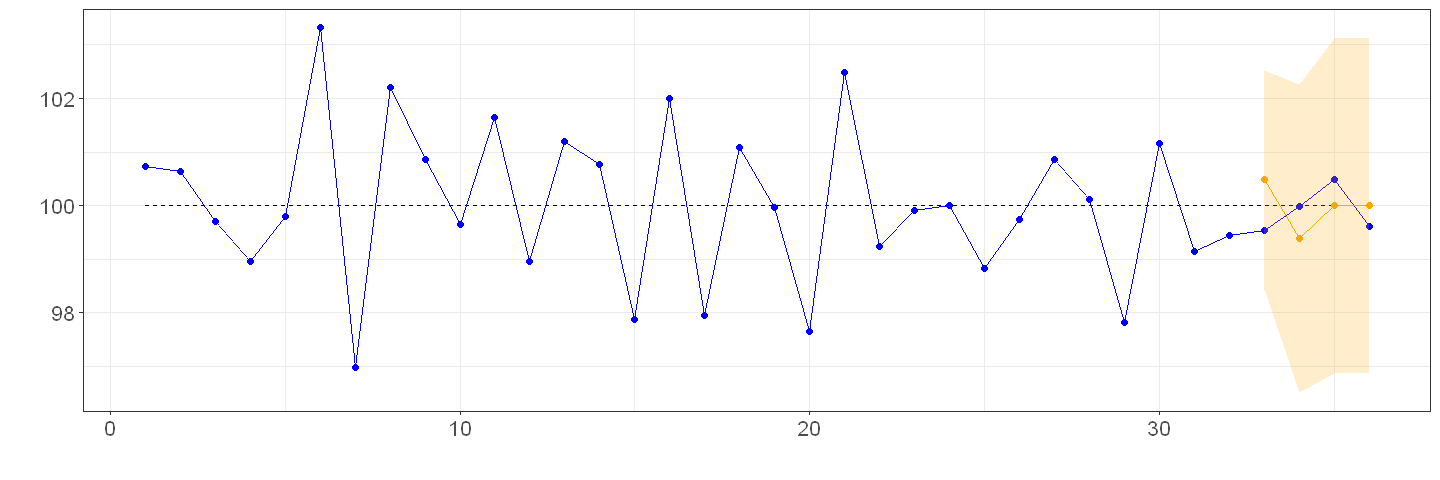

In [10]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c, d, e)** The values are within the confidence interval.  The predicted values past lag 2 are the process mean.

**(f)**


Call:
arima(x = Y[1:32], order = c(0, 0, 2), method = "ML")

Coefficients:
          ma1     ma2  intercept
      -1.0840  0.7097   100.0983
s.e.   0.1407  0.1626     0.0650

sigma^2 estimated as 0.3526:  log likelihood = -29.69,  aic = 67.37


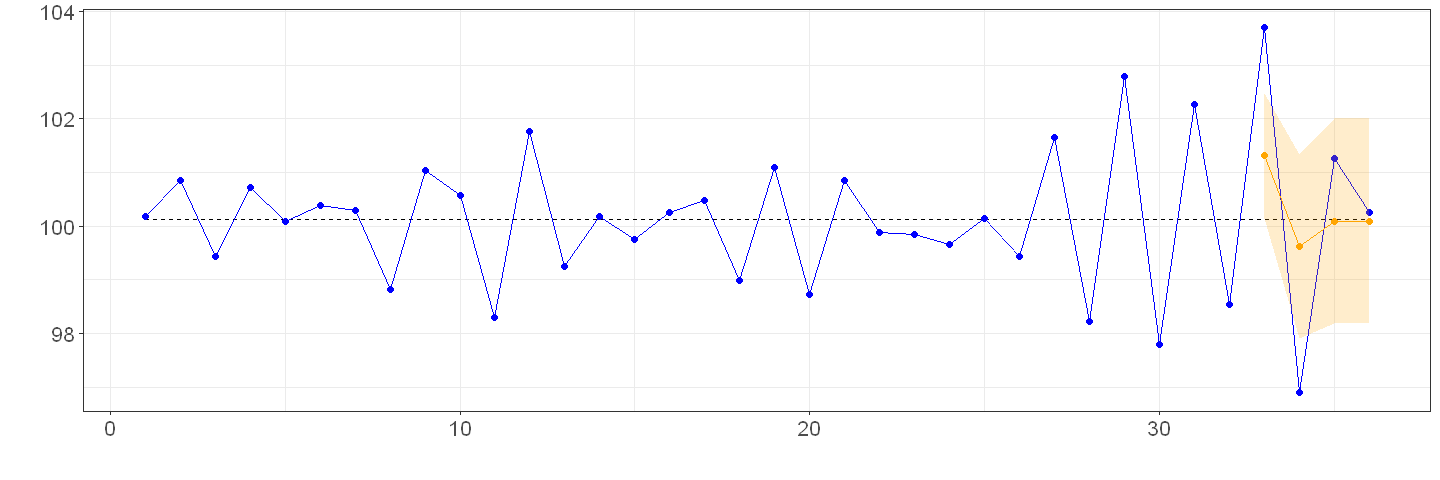

In [11]:
set.seed(2001)
Y = arima.sim(model=list(ma=c(-1, 0.6)), n=36) + 100

model = arima(Y[1:32], order=c(0, 0, 2), method='ML')
print(model)

pred = predict(model, n.ahead=4, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Once again, a few of the values seem like outliers -- and disagree with the remainder of the process.

**Exercise 9.13**. Simulate an ARMA(1,1) process with $\phi = 0.7$, $\theta = −0.5$, and $\mu = 100$.  Simulate 50 values but set aside the last 10 values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\phi$, $\theta$, and $\mu$.

**(b)** Using the estimated model, forecast the next ten values of the series.  Plot the series together with the ten forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the ten forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits.  Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [12]:
set.seed(2000)
Y = arima.sim(model=list(are=c(0.7), ma=c(0.5)), n=50) + 100

**(a)**

In [13]:
model = arima(Y[1:40], order=c(1, 0, 1), method='ML')
print(model)


Call:
arima(x = Y[1:40], order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.6892  0.6600    99.3218
s.e.  0.1149  0.1109     0.6671

sigma^2 estimated as 0.7041:  log likelihood = -50.73,  aic = 109.45


**(b)**

In [14]:
pred = predict(model, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

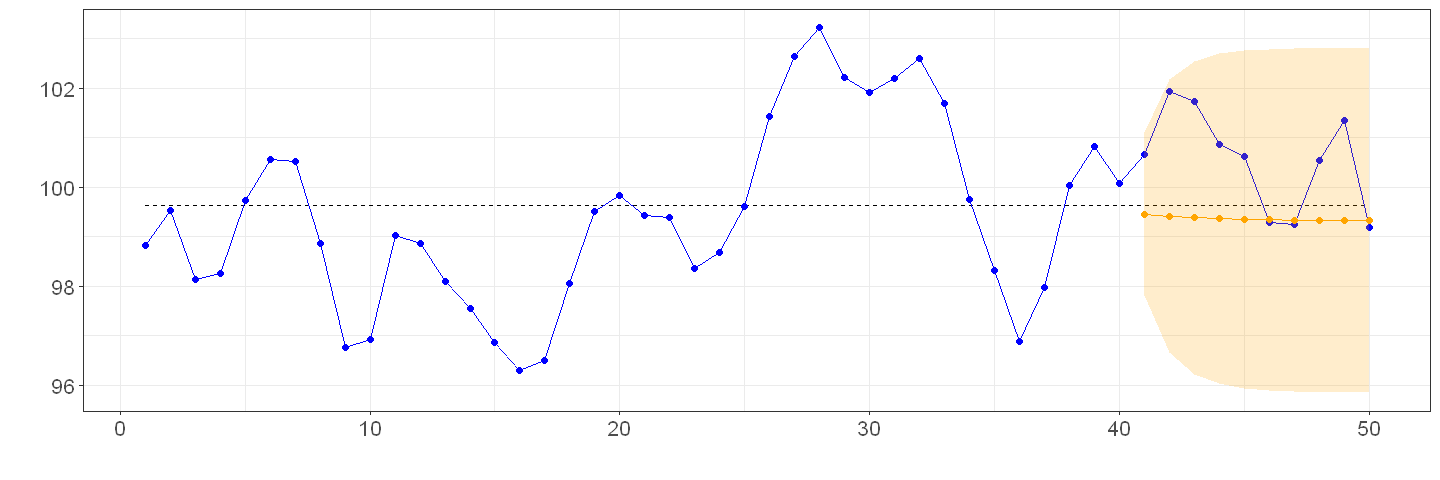

In [15]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)**  The actual values all fall within the confidence interval.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:40], order = c(1, 0, 1), method = "ML")

Coefficients:
         ar1     ma1  intercept
      0.7697  0.3700   100.2685
s.e.  0.1059  0.1654     0.8813

sigma^2 estimated as 1.032:  log likelihood = -58.17,  aic = 124.34


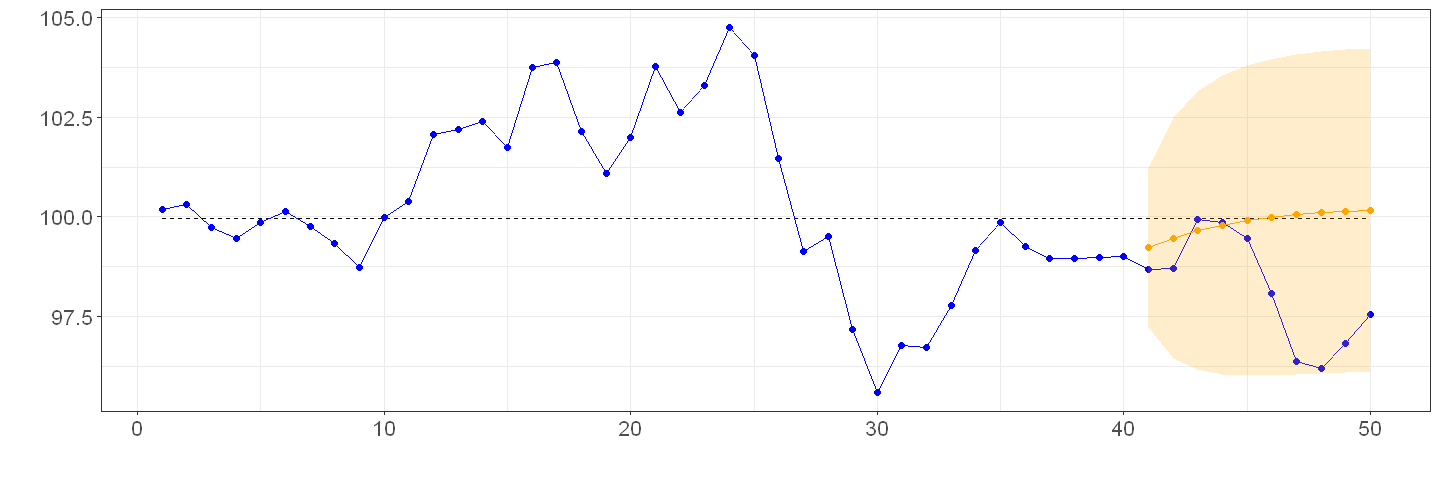

In [16]:
set.seed(2001)
Y = arima.sim(model=list(are=c(0.7), ma=c(0.5)), n=50) + 100

model = arima(Y[1:40], order=c(1, 0, 1), method='ML')
print(model)

pred = predict(model, n.ahead=10, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

All of the actual values fall within the confidence interval for the prediction.